## 1. Convert Behavioral Output File to Required Trial-by-Trial Format
Here, we convert the behavioral data into a useable format, where each row of the DataFrame corresponds to a trial. This can then be aligned with Ca2+ data.
### A. Setup

In [1]:
from behavior_base import *
from behavioral_pipeline import GoNogoBehaviorMat
import h5py
import numpy as np
import os

import behavioral_pipeline
import importlib # for editing

In [2]:
# to increase width of notebook display
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Specify session to analyze
animal = 'JUV015'
session = '220409'

In [4]:
# Grab file from server
input_folder = "C:\\Users\\hongl\\Documents\\GitHub\\madeline_go_nogo\\data"
#input_folder = "C:\\Users\\xiachong\\Documents\\GitHub\\madeline_go_nogo\\data"
input_file = "JUV015_220409_behaviorLOG.mat"
hfile = h5py.File(os.path.join(input_folder, input_file), 'r')
hfile['out'].keys() # prints trial variables

<KeysViewHDF5 ['GoNG_EventTimes', 'directdelivery', 'frame_time', 'portside', 'recovered_frame_time', 'result', 'run_speed', 'schedule', 'sound_SPL', 'sound_dur', 'sound_freq', 'sound_name']>

In [5]:
# format trial events
eventlist = EventNode(None, None, None, None)
code_map = GoNogoBehaviorMat.code_map
trial_events = np.array(hfile['out/GoNG_EventTimes'])
running_speed = np.array(hfile['out/run_speed'])
frame_time = np.array(hfile['out/frame_time'])


In [6]:
# find shapes and sizes of components of task
for k in hfile['out']:
    print(k, hfile['out'][k])

GoNG_EventTimes <HDF5 dataset "GoNG_EventTimes": shape (6573, 3), type "<f8">
directdelivery <HDF5 dataset "directdelivery": shape (406, 1), type "<f8">
frame_time <HDF5 dataset "frame_time": shape (1, 28987), type "<f8">
portside <HDF5 dataset "portside": shape (406, 1), type "<f8">
recovered_frame_time <HDF5 dataset "recovered_frame_time": shape (1, 28987), type "<f8">
result <HDF5 dataset "result": shape (406, 1), type "<f8">
run_speed <HDF5 dataset "run_speed": shape (7188, 2), type "<f8">
schedule <HDF5 dataset "schedule": shape (406, 1), type "<f8">
sound_SPL <HDF5 dataset "sound_SPL": shape (16, 1), type "<f8">
sound_dur <HDF5 dataset "sound_dur": shape (16, 1), type "<f8">
sound_freq <HDF5 dataset "sound_freq": shape (16, 1), type "<f8">
sound_name <HDF5 dataset "sound_name": shape (16, 1), type "|O">


### B. Generate TrialByTrial


In [7]:
for i in range(len(trial_events)):
    eventID, eventTime, trial = trial_events[i]
    eventlist.append(EventNode(code_map[eventID][0] + '|' + code_map[eventID][1], eventTime, trial, eventID))

In [8]:
eventlist.as_df() # shows what we consider "events" in each trial

,event,etime,trial,ecode
0,sound_on|4,1663.447028,1.0,7.04
1,in|in,1663.753360,1.0,3.00
2,water_valve|2,1663.755527,1.0,9.02
3,outcome|go_correct_reward2,1663.755527,1.0,81.22
4,out|out,1663.774361,1.5,4.00
...,...,...,...,...
6568,out|out,5246.140705,404.5,44.00
6569,sound_on|8,5248.142023,405.0,7.08
6570,outcome|no-go_correct_unrewarded,5251.392343,405.0,81.01
6571,sound_on|11,5255.571826,406.0,7.11


In [9]:
trialbytrial = GoNogoBehaviorMat(animal, session, os.path.join(input_folder, input_file));

In [10]:
result_df = trialbytrial.to_df()
result_df
# why NaNs for last_lick_out?
# reward?
# quality?
# sound_num: identity of sound stimulus (1-16)
# reward: 2:hit; 0: correct rejection; -1: mistake

,animal,session,trial,onset,first_lick_in,last_lick_out,water_valve_on,outcome,licks,running_speed,time_0,sound_num,reward,go_nogo,licks_out,quality,water_valve_amt,choice
0,JUV015,220409,1,0.000000,0.306332,1.832993,0.308499,0.308499,"[0.3063319999998839, 0.4184989999998834, 0.550...","[[[-2.8370280000001458, 0.0], [-2.357028000000...",1663.447028,4,2,go,15,normal,2,2
1,JUV015,220409,2,4.703148,4.868481,8.264473,4.870814,4.870814,"[4.868480999999974, 4.960980000000063, 5.06947...","[[[2.0229719999999816, 0.0064599483204124805],...",1663.447028,2,2,go,17,normal,2,2
2,JUV015,220409,3,10.265793,10.391292,20.894417,NaN,10.391292,"[10.391292000000021, 10.497292000000016, 19.52...","[[[7.3629719999999, 0.5074786324786502], [7.86...",1663.447028,5,-1,nogo,8,normal,NaN,-1
3,JUV015,220409,4,24.347736,NaN,NaN,NaN,27.598057,[],"[[[21.552971999999954, 0.3625235404896925], [2...",1663.447028,8,0,nogo,0,normal,NaN,0
4,JUV015,220409,5,31.285875,31.478541,32.975868,31.480716,31.480716,"[31.47854099999995, 31.57071299999984, 31.6722...","[[[28.74297200000001, 0.8981481481479439], [29...",1663.447028,2,2,go,15,normal,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,JUV015,220409,402,3563.356080,3563.475915,3569.436222,3563.478246,3563.478246,"[3563.4759149999995, 3563.5687460000004, 3563....","[[[3560.8729719999997, 1.0630341880351548], [3...",1663.447028,4,2,go,15,normal,2,2
402,JUV015,220409,403,3571.437381,NaN,NaN,NaN,3574.687702,[],"[[[3568.892972, 0.6045751633984341], [3569.412...",1663.447028,6,0,nogo,0,normal,NaN,0
403,JUV015,220409,404,3578.401020,3578.557519,3582.693677,3578.559686,3578.559686,"[3578.5575189999995, 3578.644019, 3578.7535190...","[[[3575.762972, 1.564814814813866], [3576.3829...",1663.447028,4,2,go,14,normal,2,2
404,JUV015,220409,405,3584.694995,NaN,NaN,NaN,3587.945315,[],"[[[3589.222972, 0.8240740740735745], [3589.842...",1663.447028,8,0,nogo,0,normal,NaN,0


In [11]:
# save as csv file
result_df.to_csv(f"{animal}_{session}_behavior_output.csv")

# save the csv file to the root location

In [12]:
# add some plot to show the performance
# 1. psychometric curve
# 2. lickrate by trial type, lickrate align to the start of the trial and end of the trial
# 3. response time by trial type
# 4. intertrial-interval distrubution
# 5. running speed aligned to the trial-start, lick, reward
saveBehFigPath = os.path.join(input_folder, 'beh_plot')

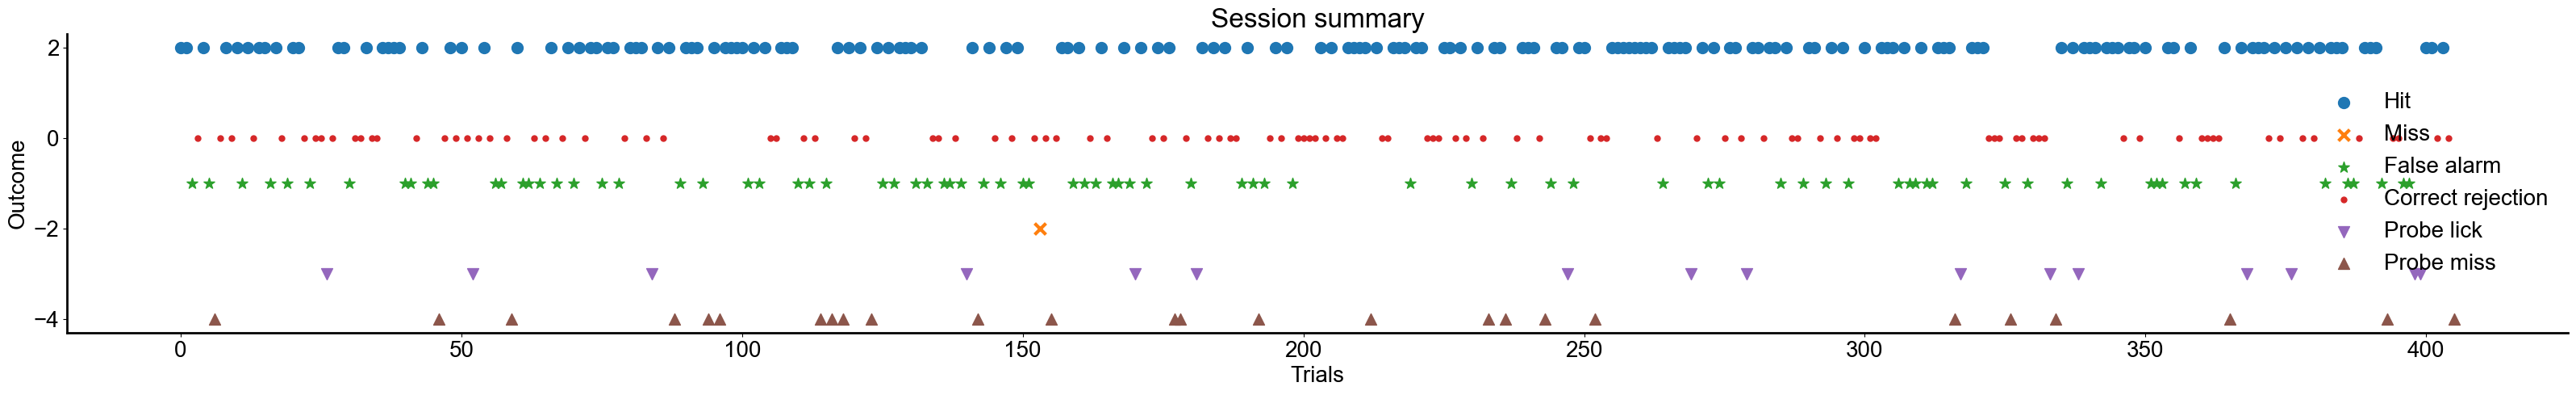

In [13]:
behPlot = trialbytrial.beh_session()
behPlot.save_plot('Behave summary.svg', 'svg', saveBehFigPath)
behPlot.save_plot('Behave summary.tif', 'tif', saveBehFigPath)

Estimated parameters:  [0.41618438]


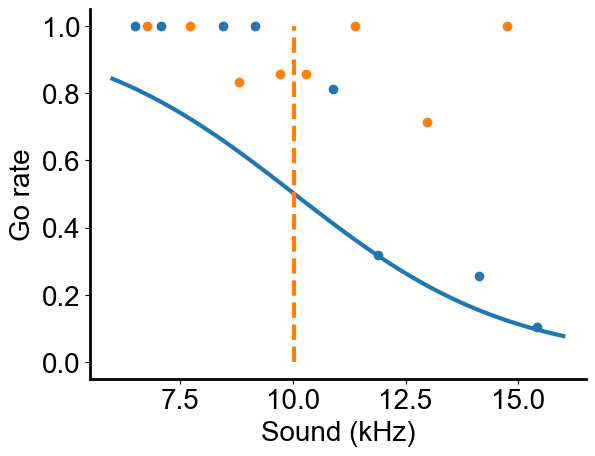

In [14]:
# psychometric curve
psyPlot = trialbytrial.psycho_curve()
psyPlot.save_plot('Psychometric curve.svg', 'svg', saveBehFigPath)
psyPlot.save_plot('Psychometric curve.tif', 'tif', saveBehFigPath)

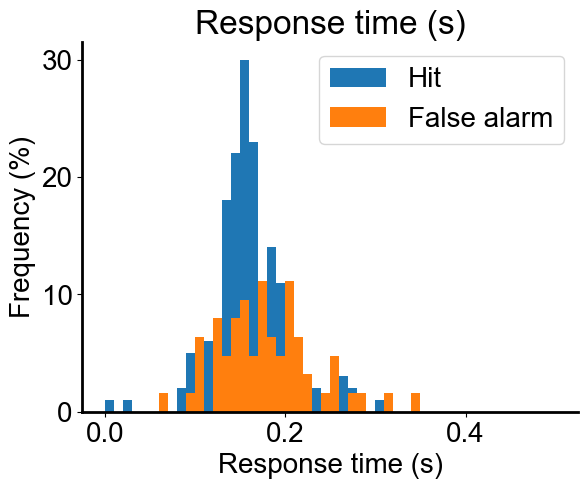

In [15]:
rtPlot = trialbytrial.response_time()
rtPlot.save_plot('Response time.svg', 'svg', saveBehFigPath)
rtPlot.save_plot('Response time.tif', 'tif', saveBehFigPath)

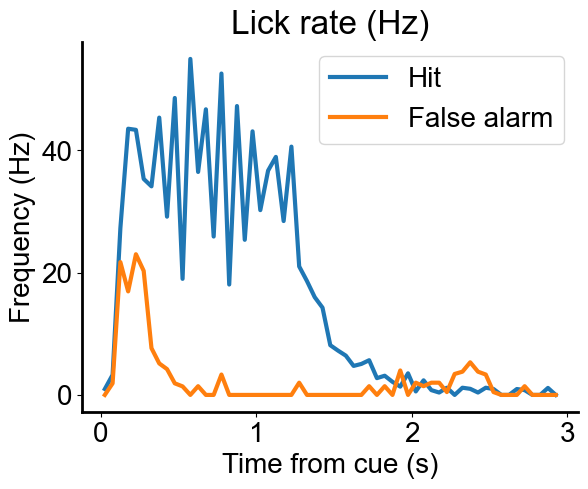

In [16]:
# plot lick rate for Hit/false alarm trials
lickRatePlot = trialbytrial.lick_rate()
lickRatePlot.save_plot('Lick rate.svg', 'svg', saveBehFigPath)
lickRatePlot.save_plot('Lick rate.tif', 'tif', saveBehFigPath)

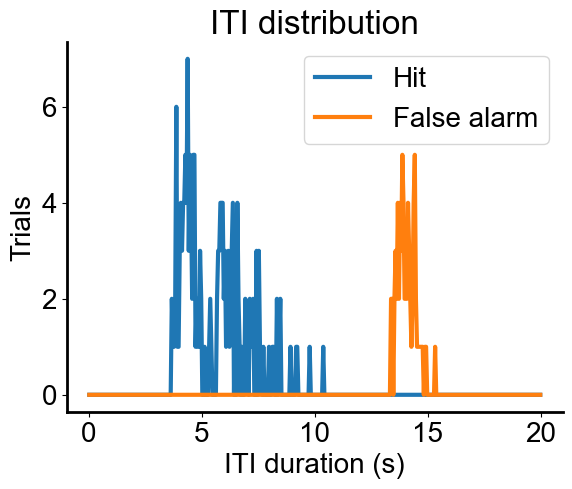

In [17]:
ITIPlot = trialbytrial.ITI_distribution()
ITIPlot.save_plot('ITI distribution.svg', 'svg', saveBehFigPath)
ITIPlot.save_plot('ITI distribution.tif', 'tif', saveBehFigPath)

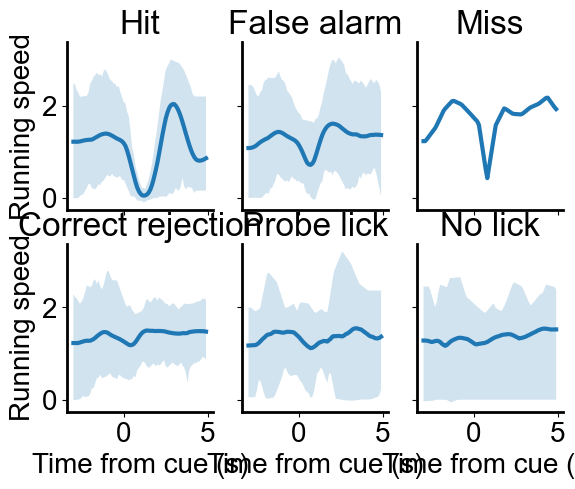

In [18]:
runPlot = trialbytrial.running_aligned()
#trialbytrial.runningSpeed
# align to different time point? response time?

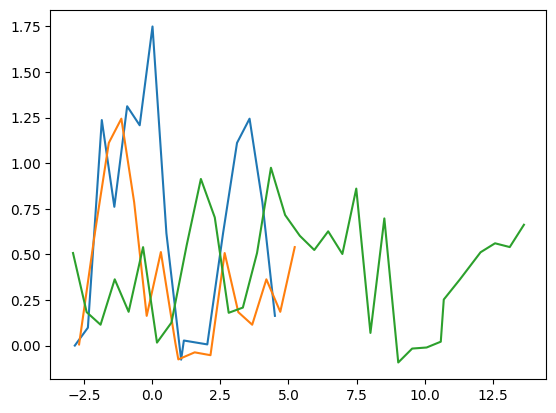

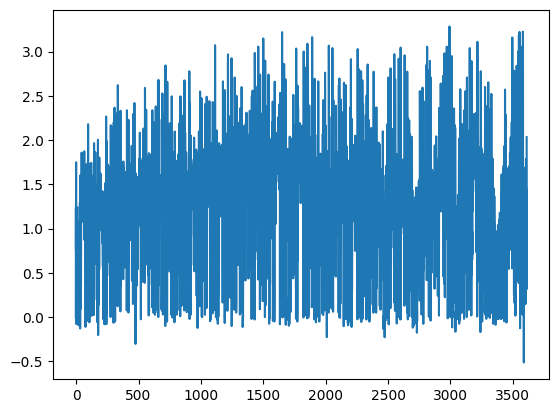

In [19]:
# check running
trial0 = np.array(trialbytrial.DF.running_speed[0])
trial1 = np.array(trialbytrial.DF.running_speed[1])
trial2 = np.array(trialbytrial.DF.running_speed[2])

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(trial0[0,:,0],trial0[0,:,1])
ax.plot(trial1[0,:,0]-trialbytrial.DF.onset[1],trial1[0,:,1])
ax.plot(trial2[0,:,0]-trialbytrial.DF.onset[2],trial2[0,:,1])
plt.show()

fig,ax = plt.subplots()
ax.plot(trialbytrial.runningSpeed[:,0],trialbytrial.runningSpeed[:,1])
plt.show()

Make sure to move the CSV file to the data_root location before continuing!

# 2. Alignment of Ca2+ Signal and Plotting
Eventually, much of the code in this section should be incorporated into a .py file that will be uploaded to github and not changed. For now, we are laying out some sections of code (particularly those that have been altered from Albert's original code) explicitly, so we can develop a better understanding of what's going on.
### A. Setup

In [ ]:
from behavioral_albert_MKedits import *
# NOTE: this is a locally saved file, same as behavioral_albert.py in nkeil github! 
# goal is to eventually update a behavioral_albert file with much of this info and save it on github,
# rather than run each of these cells individually
logging.getLogger().setLevel(logging.WARNING)
%matplotlib inline

In [16]:
from tqdm import tqdm

In [17]:
data_root = r'Z:\Madeline\processed_data'
gse = GoNoGo_Expr(data_root)

NameError: name 'GoNoGo_Expr' is not defined

### B. Calculate dF/F
Here, we create functions that will be used in our conversion from raw Ca2+ data to dF/F. The first cell will eventually be updated in the .py file on github. To run this notebook, we have downloaded a version of that .py file locally (specified 3 cells above).

In [ ]:
class Suite2pSeries:

    def __init__(self, suite2p):
        suite2p = os.path.join(suite2p, 'plane0')
        Fraw = np.load(oj(suite2p, 'F.npy'))
        ops = np.load(oj(suite2p, 'ops.npy'), allow_pickle=True)
        neuropil = np.load(oj(suite2p, 'Fneu.npy'))
        cells = np.load(oj(suite2p, 'iscell.npy'))
        stat = np.load(oj(suite2p, 'stat.npy'), allow_pickle=True)
        self.Fraw = Fraw
        self.ops = ops
        self.neuropil = neuropil
        self.cells = cells
        self.stat = stat

        F = Fraw - neuropil * 0.7  # subtract neuropil
        numcells = np.sum(cells[:, 0] == 1.0) # find number of cells
        Fcells = np.zeros((numcells, F.shape[1])) # establish array of ROIs that are cells
        counter = 0
        for cell in range(0, len(cells)):
            if cells[cell, 0] == 1.0:  # if ROI is a cell
                Fcells[counter] = F[cell]
                counter += 1
        
        self.neural_df = pd.DataFrame(data=Fcells.T, columns=[f'neuron{i}' for i in range(numcells)])
        self.neural_df['time'] = np.arange(self.neural_df.shape[0])        
                

    def realign_time(self, reference=None): # align Ca2+ data to same timeframe as behavior data
        if isinstance(reference, BehaviorMat):
            transform_func = lambda ts: reference.align_ts2behavior(ts)
        if self.neural_df is not None:
            self.neural_df['time'] = transform_func(self.neural_df['time'])

    def calculate_dff(self, method='robust', melt=True): # provides different options for how to calculate dF/F
        time_axis = self.neural_df['time']
        if method == 'old':
            Fcells = self.neural_df.values.T
            F0 = []
            for cell in range(0, Fcells.shape[0]):
                include_frames = []
                std = np.std(Fcells[cell])
                avg = np.mean(Fcells[cell])
                for frame in range(0, Fcells.shape[1]):
                    if Fcells[cell, frame] < std + avg:
                        include_frames.append(Fcells[cell, frame])
                F0.append(np.mean(include_frames))
            dFF = np.zeros(Fcells.shape)
            for cell in range(0, Fcells.shape[0]):
                for frame in range(0, Fcells.shape[1]):
                    dFF[cell, frame] = (Fcells[cell, frame] - F0[cell]) / F0[cell]
        elif method == 'robust':
            Fcells = self.neural_df.values.T
            dFF = np.zeros(Fcells.shape) # d
            for cell in tqdm(range(Fcells.shape[0])):
                f0_cell = robust_filter(Fcells[cell], method=12, window=200, optimize_window=2, buffer=False)[:, 0]
                dFF[cell] = (Fcells[cell] - f0_cell) / f0_cell
        dff_df = pd.DataFrame(data=dFF.T, columns=[f'neuron{i}' for i in range(Fcells.shape[0])])
        dff_df['time'] = time_axis
        if melt:
            rois = [c for c in dff_df.columns if c != 'time']
            melted = pd.melt(dff_df, id_vars='time', value_vars=rois, var_name='roi', value_name='ZdFF')
            return melted
        else:
            return dff_df
    
    def melt_dff_df(self, dff_df):
        rois = [c for c in dff_df.columns if c != 'time']
        melted = pd.melt(dff_df, id_vars='time', value_vars=rois, var_name='roi', value_name='ZdFF')
        return melted
    
    # ALBERT: I need help making this particular function work... can explain later
    def plot_cell_location_dFF(neuron_range):
        import random
        Fcells = self.neural_df.values.T
        cellstat = []
        for cell in range(0,Fcells.shape[0]):
            if cells[cell,0] > 0:
                cellstat.append(stat[cell])
        for cell in neuron_range:
            im = np.zeros((256,256))
            xs = cellstat[cell]['xpix']
            ys = cellstat[cell]['ypix']
            im[ys, xs] = random.random()
            plt.figure(figsize=(16,4))
            plt.subplot(1, 2, 1)
            plt.imshow(im, cmap='CMRmap')
            plt.subplot(1, 2, 2)
            plt.plot(dFF[cell,15000:20000], label = "Neuron " + str(cell))
            plt.legend()
        

Here we retreive our behavioral data, align it to the Ca2+ data, and calculate dF/F! The functions specified here are in the .py file.

In [ ]:
filemap = gse.encode_to_filename(animal, session, ['suite2p', 'log', 'trial'])
bmat = GNGTBehaviorMat(animal, session, filemap['log'], filemap['trial'])
gn_series = Suite2pSeries(filemap['suite2p'])
gn_series.realign_time(bmat)
bdf = bmat.todf()
dff_df_unmelted = gn_series.calculate_dff(melt=False)
dff_df = gn_series.melt_dff_df(dff_df_unmelted)

In [ ]:
dff_df.to_csv(f"{animal}_{session}_dff_df_file.csv")

In [ ]:
bdf.to_csv(f"{animal}_{session}_bdf_file.csv")

### C. Determining baseline levels of cell activity

In [ ]:
activity = pd.DataFrame()
for neuron in dff_df['roi'].unique():
    df_byneuron = dff_df[dff_df['roi']==neuron]
    activity.loc[neuron,'mean_ZdFF'] = df_byneuron['ZdFF'].mean()

In [ ]:
most_active = []
least_active = []
mid_active = []
for row in activity.index:
    if activity.loc[row,'mean_ZdFF'] > activity.mean_ZdFF.quantile(0.67):
        most_active.append(row)
    elif activity.loc[row,'mean_ZdFF'] < activity.mean_ZdFF.quantile(0.33):
        least_active.append(row)
    else:
        mid_active.append(row)

In [ ]:
plt.figure(figsize=(16,4))
neur59 = dff_df[dff_df['roi']=='neuron59']
plt.plot(neur59.loc[:,'time'],neur59.loc[:,'ZdFF'])

In [ ]:
plt.figure(figsize=(16,16))
counter = len(mid_active)
for neuron in mid_active:
    dff = dff_df[dff_df['roi']==neuron]
    plt.plot(dff.loc[:,'time'],dff.loc[:,'ZdFF']+ (2*counter))
    counter -= 1

In [ ]:
dff_df

# 3. Detecting cell responsiveness
Here we define a functions to plot the neuronal activity of a list of neurons aligned to a certain event. Below are a few similar functions that use different thresholds to determine neuronal responsiveness.

In [ ]:
dff_df = pd.read_csv('JUV015_220409_dff_df_file.csv')

In [ ]:
gse.nbm.event_time_windows['onset'] = np.arange(-2, 2.001, 0.05) # change window visible in plot
gse.nbm.event_time_windows['first_lick_in'] = np.arange(0, 2.001, 0.05)

### A. Thresholding for each cue individually

Here we can view a table listing the fluorescent values for each trial of a given cell.

In [ ]:
neur_dff_df = dff_df[dff_df['roi'] == 'neuron77'].reset_index(drop=True)
df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, ['onset'], form='wide')
df

Here we set thresholds for excitatory and inhibitory responses and plot the cells' average fluorescent trace + StDev.

In [ ]:
def plot_thres(event, neuron_range, sound_range=list(range(1,17)), hue=None, x_axis=None, y_axis=None, palette=None):
    neurons = [f'neuron{i}' for i in neuron_range]
    neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
    df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
    plot_df = gse.nbm.lag_wide_df(df, {f'{event}_neur': {'long':True}})
    plot_df = plot_df[plot_df['sound_num'].isin(sound_range)]
    plot_df_hits = plot_df[(plot_df['reward']!=-1)]
    plot_df_FA = plot_df[(plot_df['reward']==-1)]
    df_hits = df[(df['reward']!=-1)]
    df_FA = df[(df['reward']==-1)]
    if x_axis is None:
        x_axis = f'{event}_neur_time'
    if y_axis is None:
        y_axis = f'{event}_neur_ZdFF'
    if palette is None:
        palette = 'Spectral'
    p = sns.relplot(data=plot_df, x=f'{event}_neur_time', y=f'{event}_neur_ZdFF', hue=hue, row='roi', col='sound_num', ci='sd', kind='line', palette=palette)
    p.set_xlabels(x_axis, fontsize = 15)
    p.set_ylabels(y_axis, fontsize = 15)
    thresholds_max = []
    thresholds_min = []
    postthres = []
#    meanstds = []
    for neuron in df['roi'].unique():
        df_byneuron = df_hits[df_hits['roi']==neuron]
        for num in sound_range:
            df_bycue = df_byneuron[(df_byneuron['sound_num']==num)]
            prestim = df_bycue.iloc[:,16:56].describe()
            poststim = (df_bycue.iloc[:,57:].describe()).loc['mean']
#            poststds = (df_bycue.iloc[:,37:].describe()).loc['std']
            meanofmeans = np.mean(prestim.loc['mean'])
            postmean = np.mean(poststim)
            stdofmeans = np.std(prestim.loc['mean'])
            meanofstds = np.mean(prestim.loc['std'])
            thresholds_max.append(meanofmeans + 3*stdofmeans)
            thresholds_min.append(meanofmeans - 3*stdofmeans)
            postthres.append(postmean)
    for ax in p.axes.ravel():
        ax.axvline(0, ls='--', c='k',lw=2)
    #for i, ax in enumerate(p.axes.flatten()):
    #    ax.axhline(thresholds_min[i], ls=':', c='k')
    #    ax.axhline(thresholds_max[i], ls=':', c='k')
    #    ax.axhline(postthres[i],c='r')

In [ ]:
plot_thres('onset',[72], 
           sound_range=[1,2,3,4,5,6,7,8],
           hue='sound_num', 
           x_axis="Time Relative to Cue Onset", 
           y_axis="dF/F",
           palette='seismic')

Here we set thresholds for excitatory and inhibitory responses. We create a dataframe and count the cue events to which each cell is responsive.

In [ ]:
pth = None
def responsive_table(event, neuron_range, sound_range=list(range(1,17)), hue=None, x_axis=None, y_axis=None, palette=None):
    neurons = [f'neuron{i}' for i in range(*neuron_range)]
    neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
    df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
    plot_df = gse.nbm.lag_wide_df(df, {f'{event}_neur': {'long':True}})
    plot_df = plot_df[plot_df['sound_num'].isin(sound_range)]
    plot_df_hits = plot_df[(plot_df['reward']!=-1)]
    df_hits = df[(df['reward']!=-1)]
    past_thresh = pd.DataFrame(0, index=[df['roi'].unique()], 
                               columns=['Go-E', 'Go-I', 'NoGo-E', 'NoGo-I','total','both-E','both-I','both-mixed','single-E','single-I'])
    for neuron in df['roi'].unique():
        df_byneuron = df_hits[df_hits['roi']==neuron]
        for num in sound_range:
            df_bycue = df_byneuron[(df_byneuron['sound_num']==num)]
            prestim = df_bycue.iloc[:,16:37].describe()
            poststim = (df_bycue.iloc[:,37:].describe()).loc['mean']
            poststds = (df_bycue.iloc[:,37:].describe()).loc['std']
            meanofmeans = np.mean(prestim.loc['mean'])
            postmean = np.mean(poststim)
            stdofmeans = np.std(prestim.loc['mean'])
            meanofstds = np.mean(prestim.loc['std'])
            if num < 5:
                if any(postmean > (meanofmeans + 3*stdofmeans) for val in range(0,len(poststim))): # if go cue increased response
                    past_thresh.loc[neuron,'Go-E'] += 1
                if any(postmean < (meanofmeans - 3*stdofmeans) for val in range(0,len(poststim))): # if go cue decreased response
                    past_thresh.loc[neuron,'Go-I'] += 1
            if num > 4 and num < 9:
                if any(postmean > (meanofmeans + 3*stdofmeans) for val in range(0,len(poststim))): # if nogo cue increased response
                    past_thresh.loc[neuron,'NoGo-E'] += 1
                if any(postmean < (meanofmeans - 3*stdofmeans) for val in range(0,len(poststim))): # if nogo cue decreased response
                    past_thresh.loc[neuron,'NoGo-I'] += 1
        past_thresh['total'] = past_thresh['Go-E'] + past_thresh['NoGo-E'] + past_thresh['Go-I'] + past_thresh['NoGo-I']
        if any(past_thresh.loc[neuron,'Go-E'] > 0) and any(past_thresh.loc[neuron,'NoGo-E'] > 0):
            past_thresh.loc[neuron,'both-E'] = 1
        if any(past_thresh.loc[neuron,'Go-I'] > 0) and any(past_thresh.loc[neuron,'NoGo-I'] > 0):
            past_thresh.loc[neuron,'both-I'] = 1
        if (any(past_thresh.loc[neuron,'Go-E'] > 0) and any(past_thresh.loc[neuron,'NoGo-I'] > 0)) or (any(past_thresh.loc[neuron,'Go-I'] > 0) and any(past_thresh.loc[neuron,'NoGo-E'] > 0)):
            past_thresh.loc[neuron,'both-mixed'] = 1
        if any(past_thresh.loc[neuron,'Go-E'] + past_thresh.loc[neuron,'NoGo-E'] == 1):
            past_thresh.loc[neuron,'single-E'] = 1
        if any(past_thresh.loc[neuron,'Go-I'] + past_thresh.loc[neuron,'NoGo-I'] == 1):
            past_thresh.loc[neuron,'single-I'] = 1
          #  for val in range(0,len(poststim)):
          #      if (poststim[val]-poststds[val] > meanofmeans + 2*stdofmeans) or (poststim[val]+poststds[val] < meanofmeans - 2*stdofmeans):
          #          past_thresh.loc[neuron,num] += 1
           # if postmean > (meanofmeans + 3*stdofmeans) or postmean < (meanofmeans - 3*stdofmeans): # if go cue increased response
            #    past_thresh.loc[neuron,num] += 1
            #past_thresh.loc[neuron,num] = past_thresh.loc[neuron,num] / 40 * 100
#    for ax in p.axes.ravel():
#        ax.axvline(0, ls='--', c='k',lw=2)
#    for i, ax in enumerate(p.axes.flatten()):
#        ax.axhline(thresholds_min[i], ls=':', c='k')
#        ax.axhline(thresholds_max[i], ls=':', c='k')
    return past_thresh

In [ ]:
responses = responsive_table('onset',(0,166), 
               sound_range=[1,2,3,4,5,6,7,8],
               hue='sound_num', 
               x_axis="Time Relative to Cue Onset", 
               y_axis="dF/F",
               palette='seismic')

total_res = responses.sum()
total_res


In [ ]:
binary = responses
binary[binary > 1] = 1
binary.sum()

In [ ]:
#responsive = binary[binary.isin([1]).any(axis=1)]
responsive = binary[binary["Go-E"] == 1]
responsive

In [ ]:
neuron_list = list(responsive.index)

### B. Statistical testing for responsiveness

In [ ]:
pd.options.mode.chained_assignment = None

def wilcoxon_by_cue(event, neuron_range, sound_range=list(range(1,17))):
    neurons = [f'neuron{i}' for i in neuron_range]
    neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
    df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
    plot_df = gse.nbm.lag_wide_df(df, {f'{event}_neur': {'long':True}})
    plot_df = plot_df[plot_df['sound_num'].isin(sound_range)]
    #df_hits = df[(df['reward']!=-1)]
    df_gonogo = df[(df['sound_num']<9)]
    wilcoxon = pd.DataFrame()
    wilcoxon_sig = pd.DataFrame()
    for neuron in df['roi'].unique():
        df_byneuron = df_gonogo[df_gonogo['roi']==neuron]
        for num in sound_range:
            df_bycue = df_byneuron[(df_byneuron['sound_num']==num)]
            df_bycue['precue_avg'] = np.mean(df_bycue.iloc[:,16:56], axis=1)
            df_bycue['postcue_avg'] = np.mean(df_bycue.iloc[:,57:97], axis=1)
            stat, pval = scipy.stats.ranksums(df_bycue['precue_avg'], df_bycue['postcue_avg'])
            wilcoxon.loc[neuron,num] = pval
            if pval < 0.01:
                wilcoxon_sig.loc[neuron,num] = 1
            else:
                wilcoxon_sig.loc[neuron,num] = 0
    return wilcoxon, wilcoxon_sig

In [ ]:
pval_table, sig_table = wilcoxon_by_cue('onset', list(range(0,165)), 
           list([1,2,3,4,5,6,7,8]))

In [ ]:
sig_table['go_sum'] = np.sum(sig_table.iloc[:,0:4], axis=1) 
sig_table['nogo_sum'] = np.sum(sig_table.iloc[:,4:8], axis=1)
sig_table['total'] = np.sum(sig_table.loc[:,['go_sum','nogo_sum']], axis=1)
sig_table

In [ ]:
sig_table['total'] = np.sum(sig_table.iloc[:,0:2], axis=1)
sig_table.rename(columns={sig_table.columns[0]: 'two'},inplace=True)
sig_table.rename(columns={sig_table.columns[1]: 'seven'},inplace=True)
sig_table

In [ ]:
go_responsive = []
nogo_responsive = []
mixed_responsive = []
for row in sig_table.index.values:
    if sig_table.loc[row,'two'] > 0 and sig_table.loc[row,'seven'] == 0.0:
        go_responsive.append(row)
    if sig_table.loc[row,'seven'] > 0 and sig_table.loc[row,'two'] == 0.0:
        nogo_responsive.append(row)
    if sig_table.loc[row,'two'] > 0 and sig_table.loc[row,'seven'] > 0:
        mixed_responsive.append(row)

In [ ]:
go_responsive = []
nogo_responsive = []
mixed_responsive = []
single_responsive = pd.DataFrame()
for row in sig_table.index.values:
    if sig_table.loc[row,'go_sum'] > 0 and sig_table.loc[row,'nogo_sum'] == 0.0:
        go_responsive.append(row)
    if sig_table.loc[row,'nogo_sum'] > 0 and sig_table.loc[row,'go_sum'] == 0.0:
        nogo_responsive.append(row)
    if sig_table.loc[row,'go_sum'] > 0 and sig_table.loc[row,'nogo_sum'] > 0:
        mixed_responsive.append(row)
    if sig_table.loc[row,'total'] == 1:
        single_responsive.loc[row,'cue'] = np.where(sig_table.loc[row] == 1)[0][0]+1

In [ ]:
print("num go-responsive cells: " + str(len(go_responsive)))
print("num no-go-responsive cells: " + str(len(nogo_responsive)))
print("num mixed-responsive cells: " + str(len(mixed_responsive)))
print("num single-cue-responsive cells: " + str(len(single_responsive)))

In [ ]:
mixed_responsive

In [ ]:
pval_table.loc['neuron59',:]

In [ ]:
def plotcell(event, neuron_range, sound_range=list(range(1,17)), hue=None, x_axis=None, y_axis=None, palette=None):
    neurons = [f'neuron{i}' for i in neuron_range]
    neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
    df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
    plot_df = gse.nbm.lag_wide_df(df, {f'{event}_neur': {'long':True}})
    plot_df = plot_df[plot_df['sound_num'].isin(sound_range)]
    if x_axis is None:
        x_axis = f'{event}_neur_time'
    if y_axis is None:
        y_axis = f'{event}_neur_ZdFF'
    if palette is None:
        palette = 'Spectral'
    p = sns.relplot(data=plot_df, x=f'{event}_neur_time', y=f'{event}_neur_ZdFF', hue=hue, row='roi', col='sound_num', ci='sd', kind='line', palette=palette)
    p.set_xlabels(x_axis, fontsize = 15)
    p.set_ylabels(y_axis, fontsize = 15)

In [ ]:
plotcell('onset',[59], 
           sound_range=[1,2,3,4,5,6,7,8],
           hue='sound_num', 
           x_axis="Time Relative to Cue Onset", 
           y_axis="dF/F",
           palette='seismic')

In [ ]:
def find_neurons(neuron_range, num):#sound_range=list(range(1,17))):
    alph_neurons = sorted(neuron_range, key=str)
    key = alph_neurons[num]
    return key

In [ ]:
find_neurons(list(range(0,164)), 119)

In [ ]:
def plot_heatmap(event, neuron_range, num):#sound_range=list(range(1,17))):
    neurons = [f'neuron{i}' for i in neuron_range]
    neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
    df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
    df_num = df[(df['sound_num']==num)]
    time = [round(num, 2) for num in np.arange(-2.00, 2.001, 0.05)]
    summary_df = pd.DataFrame(index=neurons, columns=(df.columns[15:]))
    data = []
    for neuron in df['roi'].unique():
        temp_data = []
        df_byneuron = df_num[df_num['roi']==neuron]
        for column in df_byneuron.columns[16:]:
            avg = df_byneuron[column].mean()
            temp_data.append(avg)
        data.append(temp_data)
    #df_bycue['precue_avg'] = np.mean(df_bycue.iloc[:,16:56], axis=1)
    #df_bycue['postcue_avg'] = np.mean(df_bycue.iloc[:,57:97], axis=1)
    #df_bycue.pivot('')
    fig, ax = plt.subplots(figsize=(5,15)) 
    sns.heatmap(data, cmap='Spectral_r', ax=ax, xticklabels=time)


In [ ]:
plot_heatmap('onset',list(range(0,164)),2)


In [ ]:
def plot_trials(event, neuron_range, sound_range):
    neurons = [f'neuron{i}' for i in neuron_range]
    neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
    df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
    time = np.arange(-2.00, 2.001, 0.05)
    fig, axs = plt.subplots(len(neuron_range),len(sound_range),sharex=True, figsize=(16,12))
    for neuron in df['roi'].unique():
        df_byneuron = df[df['roi']==neuron]
        num_counter = 0
        for num in sound_range:
            df_bycue = df_byneuron[(df_byneuron['sound_num']==num)]
            counter = df_bycue.shape[0]
            for index, trial in df_bycue.iterrows():
                current_trial = np.array(trial[16:])
                axs[num_counter].plot(time, (current_trial + counter))
                axs[num_counter].axvline(0, ls='--', c='k',lw=1)
                counter -=1
            num_counter +=1

In [ ]:
plot_trials('onset',[58], [1,2,3,4,5,6,7,8])

### C. For go vs. no-go categories

In [ ]:
def plot_gonogo(event, neuron_range, sound_range=list(range(1,17)), hue=None, x_axis=None, y_axis=None, palette=None):
    neurons = [f'neuron{i}' for i in neuron_range]
    neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
    df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
    plot_df = gse.nbm.lag_wide_df(df, {f'{event}_neur': {'long':True}})
    plot_df = plot_df[plot_df['sound_num'].isin(sound_range)]
    plot_df_hits = plot_df[(plot_df['reward']!=-1)]
    df_hits = df[(df['reward']!=-1)]
    df_gonogo = df_hits[(df_hits['sound_num']<9)]
    if x_axis is None:
        x_axis = f'{event}_neur_time'
    if y_axis is None:
        y_axis = f'{event}_neur_ZdFF'
    if palette is None:
        palette = 'Spectral'
    p = sns.relplot(data=plot_df, x=f'{event}_neur_time', y=f'{event}_neur_ZdFF', hue=hue, row='roi', col='go_nogo', ci='sd', kind='line', palette=palette)
    p.set_xlabels(x_axis, fontsize = 15)
    p.set_ylabels(y_axis, fontsize = 15)
    mannwhitney = pd.DataFrame(index=[df['roi'].unique()], columns=['Go','No-go'])
    for neuron in df['roi'].unique():
        df_byneuron = df_gonogo[df_gonogo['roi']==neuron]
        go_trials = df_byneuron[(df_byneuron['go_nogo']=='go')]
        nogo_trials = df_byneuron[(df_byneuron['go_nogo']=='nogo')]    
        go_prestim = (go_trials.iloc[:,16:56].describe()).loc['mean']
        go_poststim = (go_trials.iloc[:,57:].describe()).loc['mean']
        go_max_thres = np.mean(go_prestim) + (3*np.std(go_prestim))
        go_min_thres = np.mean(go_prestim) - (3*np.std(go_prestim))
        go_post_thres = np.mean(go_poststim)
        nogo_prestim = (nogo_trials.iloc[:,16:56].describe()).loc['mean']
        nogo_poststim = (nogo_trials.iloc[:,57:].describe()).loc['mean']
        nogo_max_thres = np.mean(nogo_prestim) + (3*np.std(nogo_prestim))
        nogo_min_thres = np.mean(nogo_prestim) - (3*np.std(nogo_prestim))
        nogo_post_thres = np.mean(nogo_poststim)
        go_mwu, go_pval = scipy.stats.mannwhitneyu(go_prestim, go_poststim, alternative='two-sided')
        mannwhitney.loc[neuron,'Go'] = go_pval
        nogo_mwu, nogo_pval = scipy.stats.mannwhitneyu(nogo_prestim, nogo_poststim, alternative='two-sided')
        mannwhitney.loc[neuron,'No-go'] = nogo_pval
    for ax in p.axes.ravel():
        ax.axvline(0, ls='--', c='k',lw=2)
    p.axes[0,0].axhline(go_max_thres, ls=':', c='k')
    p.axes[0,0].axhline(go_min_thres, ls=':', c='k')
    p.axes[0,0].axhline(go_post_thres, c='r')
    p.axes[0,1].axhline(nogo_max_thres, ls=':', c='k')
    p.axes[0,1].axhline(nogo_min_thres, ls=':', c='k')
    p.axes[0,1].axhline(nogo_post_thres, c='r')
    #for i, ax in enumerate(p.axes.flatten()):
    #    ax.axhline(thresholds_min[i], ls=':', c='k')
    #    ax.axhline(thresholds_max[i], ls=':', c='k')
    #    ax.axhline(postthres[i],c='r')
    return mannwhitney

In [ ]:
plot_gonogo('onset',[0], 
           sound_range=[1,2,3,4,5,6,7,8],
           hue='go_nogo', 
           x_axis="Time Relative to Cue Onset", 
           y_axis="dF/F",
           palette='seismic')

### D. Licking vs. Not Licking

In [ ]:
bdf

In [ ]:
(false_alarm[false_alarm['sound_num'] == 8]).shape[0]

In [ ]:
def licking(event, neuron_range, hue=None, x_axis=None, y_axis=None, palette=None):
    #neurons = [f'neuron{i}' for i in neuron_range]
    neur_dff_df = dff_df[dff_df['roi'].isin(neuron_range)].reset_index(drop=True)
    df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
    df_nogo = df[df['go_nogo']=='nogo']
    plot_df = gse.nbm.lag_wide_df(df_nogo, {f'{event}_neur': {'long':True}})
 #   wilcoxon = pd.DataFrame()
 #   wilcoxon_sig = pd.DataFrame()
    p = sns.relplot(data=plot_df, x=f'{event}_neur_time', y=f'{event}_neur_ZdFF', hue=hue, row='roi', col='sound_num', ci='sd', kind='line', palette=palette)
    p.set_xlabels(x_axis, fontsize = 15)
    p.set_ylabels(y_axis, fontsize = 15)
    
    bdf_nogo = bdf[bdf['go_nogo']=='nogo']
    correct_reject = bdf_nogo[bdf_nogo['reward'] == 0]
    false_alarm = bdf_nogo[bdf_nogo['reward'] == -1]
    counts = pd.DataFrame(0, index=['correct reject','false alarm'], columns=['cue5','cue6','cue7','cue8'])
    counts.loc['correct reject','cue5'] = (correct_reject[correct_reject['sound_num'] == 5]).shape[0]
    counts.loc['correct reject','cue6'] = (correct_reject[correct_reject['sound_num'] == 6]).shape[0]
    counts.loc['correct reject','cue7'] = (correct_reject[correct_reject['sound_num'] == 7]).shape[0]
    counts.loc['correct reject','cue8'] = (correct_reject[correct_reject['sound_num'] == 8]).shape[0]
    counts.loc['false alarm','cue5'] = (false_alarm[false_alarm['sound_num'] == 5]).shape[0]
    counts.loc['false alarm','cue6'] = (false_alarm[false_alarm['sound_num'] == 6]).shape[0]
    counts.loc['false alarm','cue7'] = (false_alarm[false_alarm['sound_num'] == 7]).shape[0]
    counts.loc['false alarm','cue8'] = (false_alarm[false_alarm['sound_num'] == 8]).shape[0]
#    for neuron in df['roi'].unique():
#        df_neur = df_nogo[df_nogo['roi']==neuron]
#        df_lick = df_neur[(df_neur['go_nogo']=='nogo') & (df_neur['reward']==-1)]
#        df_inhibit = df_nogo[(df_neur['go_nogo']=='nogo') & (df_nogo['reward']==0)]
#        for num in sound_range:
#            df_bycue = df_byneuron[(df_byneuron['sound_num']==num)]
#            df_bycue['precue_avg'] = np.mean(df_bycue.iloc[:,16:56], axis=1)
#            df_bycue['postcue_avg'] = np.mean(df_bycue.iloc[:,57:97], axis=1)
#            stat, pval = scipy.stats.ranksums(df_bycue['precue_avg'], df_bycue['postcue_avg'])
#            wilcoxon.loc[neuron,num] = pval
#            if pval < 0.01:
#                wilcoxon_sig.loc[neuron,num] = 1
#            else:
#                wilcoxon_sig.loc[neuron,num] = 0
    for ax in p.axes.ravel():
        ax.axvline(0, ls='--', c='k',lw=2)
    return counts
#    return wilcoxon, wilcoxon_sig

In [ ]:
licking('onset',['neuron72'], 
           hue='reward', 
           x_axis="Time Relative to Cue Onset", 
           y_axis="dF/F",
           palette='Spectral')

In [ ]:
plot_thres('onset',[138], 
           sound_range=[1,2,3,4,5,6,7,8],
           hue='sound_num', 
           x_axis="Time Relative to Cue Onset", 
           y_axis="dF/F",
           palette='seismic')

In [ ]:
# trial by trial plot; use df and sort by neuron

# 5. auROC

Adapted from Otis et al., 2017

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.io as sio
import os
import subprocess
import bisect
import errno
import time
import pandas
import pickle
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
from sklearn import cross_validation # check this?? getting an error
from sklearn.grid_search import GridSearchCV
import scipy.stats as stats
from sklearn.metrics import roc_auc_score as auROC
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.distributions.empirical_distribution import ECDF
import PIL
from itertools import product
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar